In [1]:
## Importing required packages
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Building an example dataframe
df = pd.DataFrame()
df['AnnualIncome'] = [6.5,7,8,8.5]
df['LifeExpectancy'] = [75,85,80,67]
df

,AnnualIncome,LifeExpectancy
0,6.5,75
1,7.0,85
2,8.0,80
3,8.5,67


## Let's plot a scatterplot of X vs y
X = df['AnnualIncome']
y = df['LifeExpectancy']

plt.scatter(X,y)
plt.xlabel('Rupees (in lakhs)')
plt.ylabel('Years')
plt.title('Annual Income vs. Life Expectancy')
plt.show()

<AxesSubplot:>

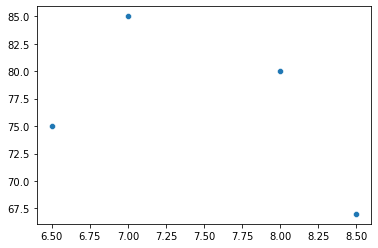

In [17]:
import seaborn as sns
sns.scatterplot(X,y)

### Decision Tree Regressor

In [19]:
X = df['AnnualIncome'].values.reshape(-1, 1)
y = df['LifeExpectancy'].values
model_dr = DecisionTreeRegressor()
model_dr.fit(X,y)

DecisionTreeRegressor()

In [20]:
print(model_dr.feature_importances_)

[1.]


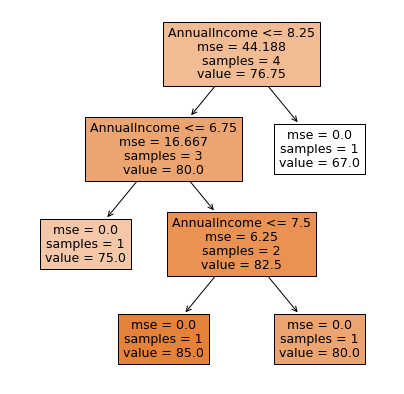

In [21]:
## Plot Decision Tree
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(model_dr, 
                   feature_names=['AnnualIncome'],
                   filled=True)

[Text(200.88000000000002, 190.26, 'AnnualIncome <= 8.25\nmse = 44.188\nsamples = 4\nvalue = 76.75'),
 Text(133.92000000000002, 135.9, 'AnnualIncome <= 6.75\nmse = 16.667\nsamples = 3\nvalue = 80.0'),
 Text(66.96000000000001, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 75.0'),
 Text(200.88000000000002, 81.53999999999999, 'AnnualIncome <= 7.5\nmse = 6.25\nsamples = 2\nvalue = 82.5'),
 Text(133.92000000000002, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 85.0'),
 Text(267.84000000000003, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 80.0'),
 Text(267.84000000000003, 135.9, 'mse = 0.0\nsamples = 1\nvalue = 67.0')]

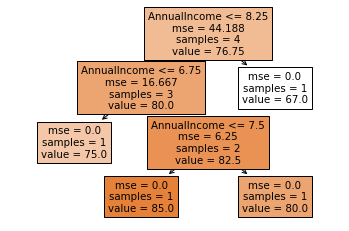

In [23]:
tree.plot_tree(model_dr,feature_names=['AnnualIncome'],
                   filled=True)

In [25]:
score = model_dr.score(X, y)

In [30]:
print("R-squared:", score)

ypred = model_dr.predict([[82.5]])
ypred

R-squared: 1.0


array([67.])

In [ ]:
#One major disadvantage of Decision Trees is that they are prone to overfitting.
#That's why they are rarely used and instead other tree based models are preferred like Random Forest and XGBoost.

Advantages

    It can be used for both Classification and Regression problems
    Easy to Understand, Interpret, Visualise
    Useful in Data exploration: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. With the help of decision trees, we can create new variables / features that has better power to predict target variable. You can refer article (Trick to enhance power of regression model) for one such trick.  It can also be used in data exploration stage.
    Less data preparation required: It is not influenced by outliers and missing values to a fair degree.
    Data type is not a constraint: It can handle both numerical and categorical variables.
    Non Parametric Method: Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.
    Can capture Nonlinear relationships

Disadvantages

    Over fitting: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).
    Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.
    Cannot extrapolate.
    Decision trees can be unstable: Small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
    No Guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.

### Random Forest Regressor

In [6]:
## Fit model 
model_rf = RandomForestRegressor(n_estimators=1)
model_rf.fit(X, y)

RandomForestRegressor(n_estimators=1)

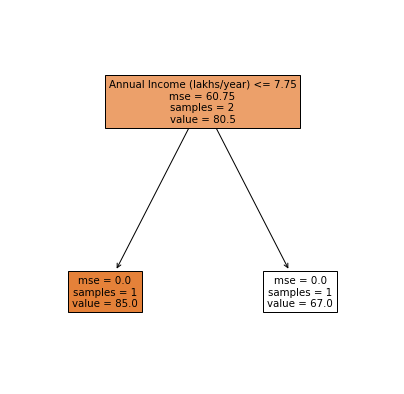

In [7]:
## Let's plot the first tree from the forest. To plot any other tree, all you need to do is replace the
## 0 in clf1 = model_rf.estimators_[0] with whichever tree you want to plot
clf1 = model_rf.estimators_[0]

fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(clf1, 
                   feature_names=['Annual Income (lakhs/year)'],
                   filled=True)

In [11]:
#Random Forest Regressor